кількість вузлів: 5 , кількість ребер: 11
[('Singapore', 6), ('San Francisco', 5), ('Tokyo', 4), ('Riga', 3), ('Copenhagen', 4)]
{'Singapore': {'weight': 5308}, 'San Francisco': {'weight': 8269}}
{'Singapore': {'San Francisco': 13574, 'Tokyo': 5308, 'Copenhagen': 9956}, 'San Francisco': {'Tokyo': 8269, 'Singapore': 13574}, 'Tokyo': {'Singapore': 5308, 'San Francisco': 8269}, 'Riga': {'Copenhagen': 868, 'San Francisco': 9016}, 'Copenhagen': {'Singapore': 9956, 'Riga': 868}}
{'Singapore': 5308, 'San Francisco': 8269, 'Tokyo': 0, 'Riga': 16132, 'Copenhagen': 15264}


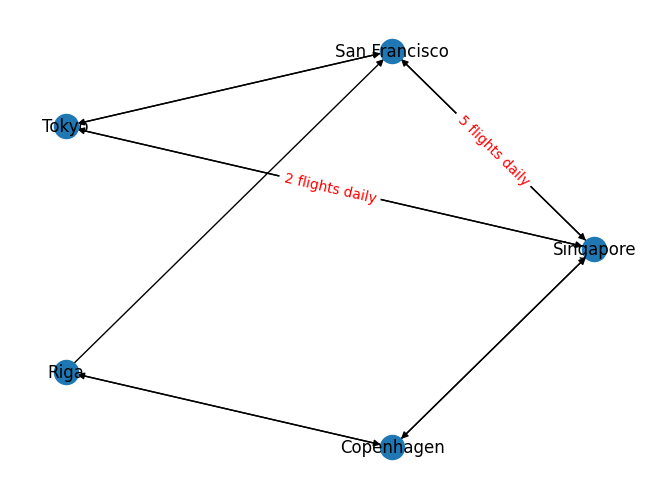

In [1]:
import networkx as nx
from collections import defaultdict

#---directed graph---
G = nx.DiGraph(directed=True)

# add nodes
G.add_node('Singapore')
G.add_node('San Francisco')
G.add_node('Tokyo')
G.add_nodes_from(['Riga', 'Copenhagen'])

# add edges
G.add_edge('Singapore','San Francisco', weight=13574)
G.add_edge('San Francisco','Tokyo', weight=8269)
G.add_edge('Riga','Copenhagen', weight=868)
G.add_edge('Copenhagen','Singapore', weight = 9956)
G.add_edge('Singapore','Tokyo', weight = 5308)
G.add_edge('Riga','San Francisco', weight=9016)
G.add_edge('San Francisco','Singapore', weight=13574)
G.add_edge('Copenhagen','Riga', weight = 868)
G.add_edge('Singapore', 'Copenhagen', weight = 9956)
G.add_edge('Tokyo', 'Singapore', weight = 5308)
G.add_edge('Tokyo', 'San Francisco', weight=8269)

# set layout
pos = nx.circular_layout(G)

# draw graph
nx.draw(G, pos, with_labels = True)

# draw edge labels
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={
        ("Singapore","Tokyo"): '2 flights daily',
        ("San Francisco","Singapore"): '5 flights daily',
    },
    font_color='red'
)


num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
#is_connected = nx.is_connected(G)
print('кількість вузлів:', num_nodes, ', кількість ребер:', num_edges)
print(G.degree)
print(G['Tokyo'])
L = {}

for x in G.nodes:
  l = {}
  for y in G[x]:
    l[y] = G[x][y]['weight']

  L[x] = l

print(L)

def dijkstra(graph, start):
    # Ініціалізація відстаней та множини невідвіданих вершин
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    unvisited = list(graph.keys())

    while unvisited:
        # Знаходження вершини з найменшою відстанню серед невідвіданих
        current_vertex = min(unvisited, key=lambda vertex: distances[vertex])

        # Якщо поточна відстань є нескінченністю, то ми завершили роботу
        if distances[current_vertex] == float('infinity'):
            break

        for neighbor, weight in graph[current_vertex].items():
            distance = distances[current_vertex] + weight

            # Якщо нова відстань коротша, то оновлюємо найкоротший шлях
            if distance < distances[neighbor]:
                distances[neighbor] = distance

        # Видаляємо поточну вершину з множини невідвіданих
        unvisited.remove(current_vertex)

    return distances



# Виклик функції для вершини "Tokyo"
print(dijkstra(L, 'Tokyo'))